['php', 'wordpress', 'woocommerce', 'oop', 'javascript', 'qa', 'automation', 'testing', 'reactjs', 'node.js', 'graphql', 'sass', 'redux', 'user-interface', 'design', 'unity3d-ui', 'java', 'python', 'sql', 'c#', 'frontend', 'backend', 'amazon-web-services', 'machine-learning', 'algorithm', 'scala', 'ruby-on-rails', 'database', 'cloud', 'rest', 'hadoop', 'bigdata', 'architecture', 'search', 'ubuntu', 'ansible', 'terraform', 'docker', 'project-management', 'agile-project-management', 'product', 'c', 'c++', 'assembly', 'embedded-linux', '.net', 'winforms', 'api', 'security', 'symfony', 'git', 'vagrant', 'nosql', 'jms', 'edi', 'erp', 'cisco', 'ios', 'xcode', 'ui', 'espresso', 'agile', 'coldfusion', 'fusion', 'cf', 'oracle', 'kafka', 'rabbitmq', 'iot', 'mysql', 'go', 'microservices', 'angularjs', 'elasticsearch', 'css', 'linux', 'unix', 'perl', 'bash', 'sharepoint-online', 'sharepoint-2013', 'react', 'd3', 'angular', 'spark', 'storm', 'julia', 'devops', 'angular-fullstack', 'saas', 'drupal',

['Raleigh', 'NC']
Raleigh
['Toronto', 'ON', 'Canada']
Toronto
['Somerville', 'MA']
Somerville
['Berlin', 'Deutschland']
Berlin
['Sofia', 'Bulgaria']
Sofia
['Milan', 'Italy']
Milan
['Kowloon', 'Hong Kong']
Kowloon
['Berlin', 'Germany']
Berlin
['Paris', 'France']
Paris
['New York', 'NY']
New York
['Berlin', 'Deutschland']
Berlin
['København', 'Denmark']
København
['Hamburg', 'Deutschland']
Hamburg
['Oisterwijk', 'Netherlands']
Oisterwijk
['Milano', 'Italy']
Milano
['Charlotte', 'NC']
Charlotte
['Langenhagen', 'Germany']
Langenhagen
['München', 'Germany']
München
['San Francisco', 'CA']
San Francisco
['Phoenix', 'AZ']
Phoenix
['Atlanta', 'GA']
Atlanta
['Nieuwegein', 'Netherlands']
Nieuwegein
['Oakland', 'CA']
Oakland
['Cambridge', 'UK']
Cambridge
['München', 'Germany']
München
['San Ramon', 'CA']
San Ramon
['Berlin', 'Deutschland']
Berlin
['Toronto', 'ON', 'Canada']
Toronto
['Hamburg', 'Germany']
Hamburg
['Dresden', 'Deutschland']
Dresden
['North Sydney', 'Australia']
North Sydney
['Fitzr

C:\Users\galli\Anaconda3\lib\site-packages\ipykernel_launcher.py:191: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Stuttgart New York Zürich Berlin Hamburg London Singapore Bangkok Rotterdam  \
0         1        2      2      6       3      3         2       1         1   

  Dublin    ...    Nieuwegein Oakland Cambridge San Ramon Dresden  \
0      1    ...             1       1         1         1       1   

  North Sydney Fitzroy Chicago Amsterdam-Zuidoost Offenburg  
0            1       1       1                  1         1  

[1 rows x 47 columns]


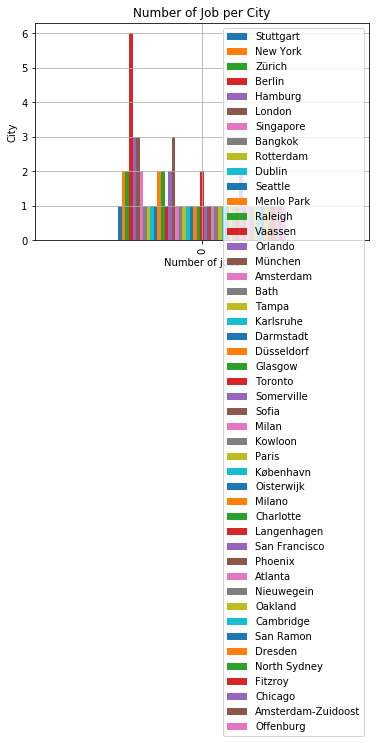

       guid                                               link  \
0    172031  https://stackoverflow.com/jobs/172031/php-deve...   
20   172017  https://stackoverflow.com/jobs/172017/senior-w...   
34   164337  https://stackoverflow.com/jobs/164337/senior-b...   
40   171995  https://stackoverflow.com/jobs/171995/web-deve...   
58   154277  https://stackoverflow.com/jobs/154277/php-deve...   
59   171970  https://stackoverflow.com/jobs/171970/laravel-...   
68   171963  https://stackoverflow.com/jobs/171963/junior-p...   
69   171962  https://stackoverflow.com/jobs/171962/senior-f...   
77   171956  https://stackoverflow.com/jobs/171956/software...   
78   171954  https://stackoverflow.com/jobs/171954/web-engi...   
79   171955  https://stackoverflow.com/jobs/171955/web-engi...   
98   171934  https://stackoverflow.com/jobs/171934/senior-p...   
114  169452  https://stackoverflow.com/jobs/169452/producti...   
118  164061  https://stackoverflow.com/jobs/164061/software...   
121  16403

In [1]:
import xml.etree.cElementTree as et
import pandas as pd
import datetime
import json
import requests
import urllib.request
import matplotlib.pyplot as plt
from urllib.request import urlopen


def getWeather(city):
    api_address = 'http://api.openweathermap.org/data/2.5/weather?appid=6d21bf1880de23784b5155e0617990d8&q='
    url = api_address + city
    json_data = requests.get(url).json()
    formatted_data = json_data['weather'][0]['description']
    return json_data

def presData(data):
    n_data = dict(
        city = data.get('name'),
        country = data.get('sys').get('country'),
        main_temp = data.get('main').get('temp'),
        main_press = data.get('main').get('pressure'),
        main_humidity = data.get('main').get('humidity'),
        wind = data.get('wind').get('speed'),
        clouds = data.get('clouds').get('all'),
        desc = data.get('weather') 
    )
    return n_data
        
def outputData(n_data):
    print('                                 ')
    print('Ville: {}'.format(n_data['city']))
    print('Pays: {}'.format(n_data['country']))
    print('Temperature actuelle: {}'.format(n_data['main_temp'])+'\xb0'+'C')
    print('Pression atmospherique: {}'.format(n_data['main_press'])+'hpa')
    print('Humidite: {}'.format(n_data['main_humidity'])+'%')
    print('Vitesse du vent: {}'.format(n_data['wind']))
    print('Nuage: {}'.format(n_data['clouds'])+'%')
    #print('Description: {}'.format(n_data['desc']))

def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None


def main():
    """ main """
    
    """ local feed.xml """
    #parsed_xml = et.parse("feed.xml")
    
    """ online feed.xml"""
    stack_file = urlopen('https://stackoverflow.com/jobs/feed') #stackoverflow parse
    stack_data = stack_file.read() #convert to string
    parsed_xml = et.fromstring(stack_data)
    
    """ set column """
    dfcols = ['guid', 'link', 'author', 'category', 'title', 'description', 'pubDate', 'updated', 'location']
    df_xml = pd.DataFrame(columns=dfcols)

    listCategoryWithoutDoublon = []
        
    """ local """
    #for node in parsed_xml.getroot():
    
    """ online """
    for node in parsed_xml:
            
        for i in node.findall('item'):
            namespaces = {'a10': 'http://www.w3.org/2005/Atom'}
            namespaces2 = {'a2': 'http://stackoverflow.com/jobs/'}
            guid = i.find('guid')
            link = i.find('link')
            name = i.find('a10:author/a10:name', namespaces)
            category = i.findall('category')
            title = i.find('title')
            description = i.find('description')
            pubDate = i.find('pubDate')
            updated = i.find('a10:updated', namespaces)
            location = i.find('{http://stackoverflow.com/jobs/}location')
                
            listCategory = []
            
            for i in range(0, len(category)):  
                listCategory.append(getvalueofnode(category[i]))
                exist = False
                
                """ list Category without duplicate """
                for j in range(0, len(listCategoryWithoutDoublon)):
                    if(getvalueofnode(category[i])==listCategoryWithoutDoublon[j]):
                        exist = True
                        
                if(exist==False):
                    listCategoryWithoutDoublon.append(getvalueofnode(category[i]))
                       
            """ df """    
            df_xml = df_xml.append(
                pd.Series([getvalueofnode(guid), getvalueofnode(link), getvalueofnode(name),
                        listCategory, getvalueofnode(title), getvalueofnode(description),
                           getvalueofnode(pubDate), getvalueofnode(updated), getvalueofnode(location)],
                          index=dfcols),
            ignore_index=True)

    """ show list of category for choice """
    print(listCategoryWithoutDoublon)
    
    loopCategory = True
    categoryChoice = []
    
    """ ask for category type """   
    while(loopCategory == True):
        exist = False
        category = input("Please enter category: ")
        
        for i in range(0, len(categoryChoice)):
            if(category==categoryChoice[i]):
                print("Category already chosen")
                exist = True
                
        if(exist==False):
            categoryChoice.append(category)
        
        endChoice = input("End choice? (Y/N)")
        
        if(endChoice == "Y" or endChoice =="y"):
            loopCategory=False
            
    temp_best=int(input("Please enter the ideal temperature (margin: 8C): "))

    """ all job related with category """       
    df2 = df_xml
    for i in range(0, len(categoryChoice)):
        mask = df2.category.apply(lambda x: categoryChoice[i] in x)
        df2 = df2[mask]
  
    listLocation = []
    """ all job related with category AND weather """       
    for i in range(0, df2.shape[0]):
        localisation = df2.get_value(df2.index[i], col = "location")
        if localisation is not None:
            localisation_list = localisation.split(", ")
        
            """ get city / j=1 """       
            for j, value in enumerate(localisation_list, 1):
                if j == 1:
                    if value == "Luxembourg City":
                        value = "Luxembourg"
                    if value == "Khwaeng Huai Khwang":
                        value = "Bangkok"
                    data = presData(getWeather(value))
                    tempCelsius = data['main_temp']-273.15
                    
                    """ column for plot without duplicate """
                    exist = False
                
                    for k in range(0, len(listLocation)):
                        if(value==listLocation[k]):
                            exist = True

                    if(exist==False):
                        listLocation.append(value)
                    
                    """ delete row not respecting condition """       
                    if not temp_best-8<=tempCelsius<=temp_best+8:
                        df2.drop(df2.index[i])
    
    """ set df columns and row with 0 """
    df_plot = pd.DataFrame(columns=listLocation)
    df_plot.loc[0] = [0 for n in range(len(listLocation))]
    
    """ number job per city / plot """
    for i in range(0, df2.shape[0]):
        localisation = df2.get_value(df2.index[i], col = "location")
        if localisation is not None:
            localisation_list = localisation.split(", ")
        
            """ get city / j=1 """       
            for j, value in enumerate(localisation_list, 1):
                if j == 1:
                    if value == "Luxembourg City":
                        value = "Luxembourg"
                    if value == "Khwaeng Huai Khwang":
                        value = "Bangkok"
                        
                    """ counter job / city """
                    for k in range(0, len(listLocation)):
                        if value==listLocation[k]:
                            df_plot.ix[0,value] += 1
        
    """ show number job/city """
    print(df_plot)

    """ set and show df plot bar """
    ax=df_plot.plot(kind='bar', grid=True, title='Number of Job per City')
    ax.set_xlabel("Number of jobs")
    ax.set_ylabel("City")
    plt.show()
    
    """ show all perfect job """
    print(df2)
    
main()


